In [54]:
from pyspark import SparkContext, SparkConf
import pandas as pd
from pyspark.sql.functions import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as mpe
#day of week börjar på söndag så söndag = 1

In [55]:
conf = SparkConf().setAppName('project')
sc = SparkContext(conf=conf)
sc

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=project, master=local[*]) created by __init__ at C:\Users\lerjebo\AppData\Local\Temp/ipykernel_15468/3232812727.py:2 

In [3]:
sc.version

'3.0.2'

In [4]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('project').config('spark.some.config.option', "some-value").getOrCreate()

In [5]:
#df1 = spark.read.csv('human_activity_raw_sensor_data/sensor_sample_float.csv', header=True)
#df2 = spark.read.csv('human_activity_raw_sensor_data/sensor_sample_int.csv', header=True)
#df3 = spark.read.csv('human_activity_raw_sensor_data/sensor.csv', header=True)

In [32]:
#df = pd.read_csv('int_sensor/livingroom-tv-light.csv')
df = spark.read.csv('int_sensor/livingroom-tv-light.csv', header=True)

In [6]:
df.count()

14865503

In [6]:
df_week10 = df[df.week == 10]

In [7]:
df_week10 = df_week10.groupBy("weekday", "hour").agg(avg("value")) #pyspark
df_week10 = df_week10.toPandas()

In [9]:
df_week10.head()

,weekday,hour,avg(value)
0,2,22,1024.0
1,5,10,1024.0
2,3,17,1024.0
3,7,12,1024.0
4,7,1,1024.0


In [58]:
def spiral_week(df, week):
    df = df[df.week == week]
    df = df.groupBy("weekday", "hour").agg(avg("value")) #pyspark
    df = df.withColumn("weekday",df.weekday.cast('int'))
    df = df.withColumn("hour",df.hour.cast('int'))
    df = df.toPandas()
    COLORMAP="viridis_r"
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='polar')
    diff = df['avg(value)'].max()-df['avg(value)'].min()
    #diff = df.select('avg(value)').rdd.max()[0]-df.select('avg(value)').rdd.min()[0]
    for idx, event in df.iterrows():
    #for event in df.rdd.collect():
        ndist = 1-float((df['avg(value)'].max()-event['avg(value)'])/diff)
        color = plt.cm.get_cmap(COLORMAP)(ndist)
        c=np.array([color])
        r = event.weekday
        area = 100
        theta = 2*np.pi/24*int(event.hour)
        ax.scatter(theta, r, c=c, s=area, alpha=0.75)
    # grid and labels
    ax.set_rticks([])
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))
    ax.set_xticklabels(['0', '3', '6', '9', '12', '15', '18', '21'])
    ax.tick_params('x', pad=2)
    ax.grid(True)
    # setup a custom colorbar, everything's always a bit tricky with mpl colorbars
    vmin = df['avg(value)'].min()
    vmax = df['avg(value)'].max()
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    sm = plt.cm.ScalarMappable(cmap=COLORMAP, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ticks=np.linspace(vmin, vmax, 10), fraction=0.04, aspect=60, pad=0.1, label="distance", ax=ax)

    #plt.savefig("spiral.png", pad_inches=0, bbox_inches="tight")
    plt.show()

In [64]:
def spiral_month(df, month):
    df = df[df.month == month]
    df = df.groupBy("week","weekday", "hour").agg(avg("value")) #pyspark
    df = df.withColumn("week",df.week.cast('int'))
    df = df.withColumn("weekday",df.weekday.cast('int'))
    df = df.withColumn("hour",df.hour.cast('int'))
    df = df.toPandas()
    COLORMAP="viridis_r"

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='polar')
    diff = df['avg(value)'].max()-df['avg(value)'].min()
    for idx, event in df.iterrows():
        if int(event.hour) % 4 == 0 and event.week != 9:
            ndist = 1-float((df['avg(value)'].max()-event['avg(value)'])/diff)
            color = plt.cm.get_cmap(COLORMAP)(ndist)
            c=np.array([color])
            r = event.week
            area = 100
            #theta = 2*np.pi/(7*6)*int(event.hour)
            theta = (int(event.weekday)-1)*2*np.pi/7+(int(event.hour)//4)*2*np.pi/(7*6)     #1 dag
            ax.scatter(theta, r, c=c, s=area, alpha=0.75)
    # grid and labels
    #plt.title(title)
    ax.set_rticks([])
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_xticks(np.linspace(0, 2*np.pi, 7, endpoint=False))
    ax.set_xticklabels(['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
    ax.tick_params('x', pad=2)
    ax.grid(True)
    # setup a custom colorbar, everything's always a bit tricky with mpl colorbars
    vmin = df['avg(value)'].min()
    vmax = df['avg(value)'].max()
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    sm = plt.cm.ScalarMappable(cmap=COLORMAP, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ticks=np.linspace(vmin, vmax, 10), fraction=0.04, aspect=60, pad=0.1, label="distance", ax=ax)

    #plt.savefig("spiral.png", pad_inches=0, bbox_inches="tight")
    plt.show()

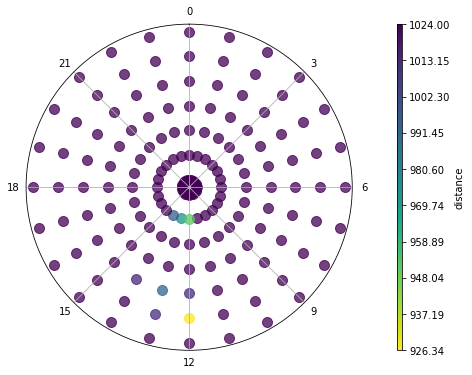

In [59]:
spiral_week(df, 10)

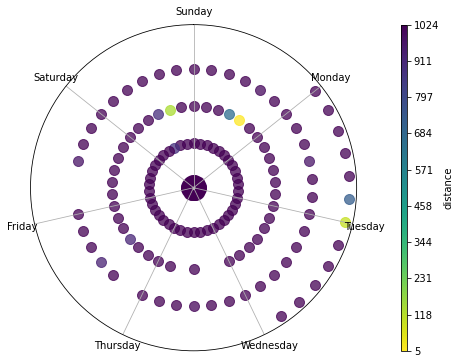

In [65]:
spiral_month(df, 3)

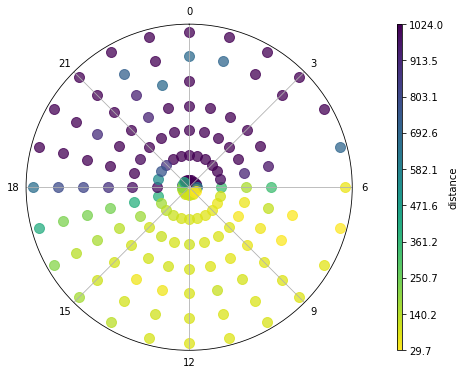

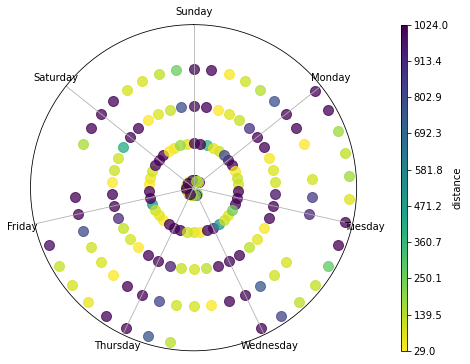

In [66]:
df = spark.read.csv('int_sensor/kitchen-stove-light.csv', header=True)
spiral_week(df, 13)
spiral_month(df, 4)

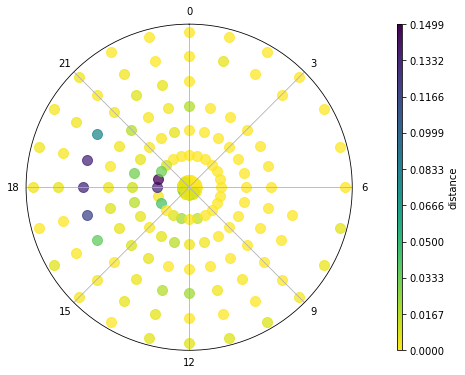

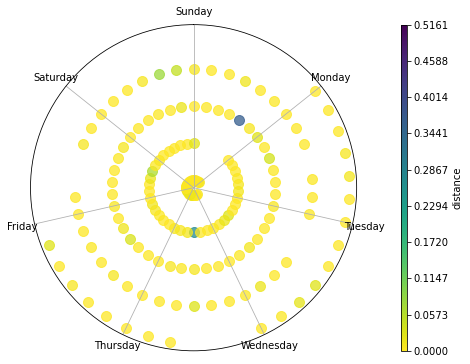

In [68]:
df = spark.read.csv('int_sensor/livingroom-ambience-motion.csv', header=True)
spiral_week(df, 13)
spiral_month(df, 4)
#spiral plottar kanske inte är så bra på sensorerna som bara har 1 och 0 eftersom vi averagar värdet